In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.9.1'

So this worked out. Now it's time to create and run a keras model. Since MNIST is getting boring, let's use the fashion MNIST dataset. If you want to learn more on the data set check out the following links

[MNIST](https://en.wikipedia.org/wiki/MNIST_database)  
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)

So in a nutsthell, MNIST contains 60000 28x28 pixel grey scale images of handwritten digits between 0-9 and the corresponding labels. Plus additional 10000 images for testing.

Fashing MNIST contains 60000 28x28 pixel grey scale images of fashion articles and the corresponding labels between 0-9. It also contains 10000 test images.

Luckyly, this data set is built in to Keras, so let's load it:

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

0


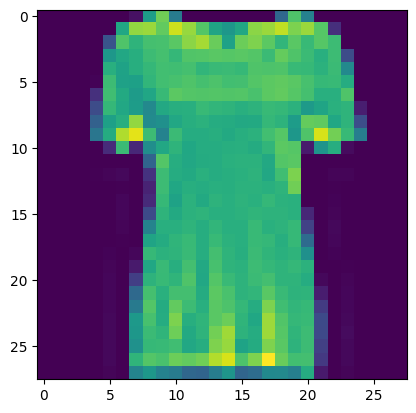

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
i = 10
print(train_labels[i])
plt.imshow(train_images[i])

As expected, we get 60000 images of 28 by 28 pixels:

In [30]:
train_images.shape

(60000, 28, 28)

The labels are simply a list of 60000 elements, each one is a number (label) between 0 and 9:

In [31]:
print(train_labels.shape)
print(train_labels)

(60000,)
[9 0 0 ... 3 0 5]


Let's have a look at one image:

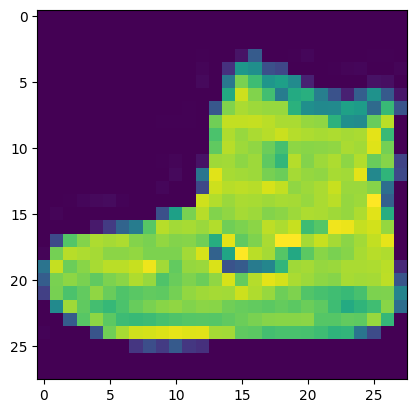

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()


So this is obviously a shoe :) - Let's normalize the data by making sure every pixel value is between 0..1; this is easy in this case:

In [33]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In order to write our **hello world** softmax regression model, the following code does the job. If you are familiar with Keras, this is really basic stuff. There is only one catch. The following code doesn't run since the latest stable Keras version is incompatible with the alpha release of TensorFlow 2.0. So the following code is for illustration purposes only. Don't run it, it will destroy your hard drive.

So from a migration and consistency perspective, it would be nice if we just could change the imports and leave our existing Keras code (which we all love) intact, so let's give it a try:

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu
from tensorflow.nn import softmax


    
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, verbose=1)

#model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5004 - accuracy: 0.8238 - val_loss: 0.4408 - val_accuracy: 0.8437
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8630 - val_loss: 0.4018 - val_accuracy: 0.8584
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3404 - accuracy: 0.8767 - val_loss: 0.3707 - val_accuracy: 0.8664
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3161 - accuracy: 0.8837 - val_loss: 0.3509 - val_accuracy: 0.8740
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2964 - accuracy: 0.8903 - val_loss: 0.3508 - val_accuracy: 0.8749


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 804us/step - loss: 0.3627 - accuracy: 0.8727
Test accuracy: 0.8726999759674072


Another way:

As you can see, we didn't change the Keras code at all, but now all imports are coming from the tensorflow package. I felt a bit bad when I've noticed that TensorFlow has eaten up Keras, but in reality, nobody uses a Keras runtime other then TensorFlow anyway, so it doesn't really matter. Just be aware that Keras is Google now and part of TensorFlow. In the next notebook, we'll cover the stategies for parallel training. So stay tuned.

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout


from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,
        #      optimizer=keras.optimizers.Adadelta(),
     #         metrics=['accuracy'])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 23s 49ms/step - loss: 0.5160 - accuracy: 0.8178 - val_loss: 0.3372 - val_accuracy: 0.8794
Epoch 2/12
469/469 [==============================] - 23s 50ms/step - loss: 0.3349 - accuracy: 0.8784 - val_loss: 0.2855 - val_accuracy: 0.8958
Epoch 3/12
469/469 [==============================] - 24s 50ms/step - loss: 0.2881 - accuracy: 0.8964 - val_loss: 0.2606 - val_accuracy: 0.9037
Epoch 4/12
469/469 [==============================] - 23s 49ms/step - loss: 0.2568 - accuracy: 0.9066 - val_loss: 0.2599 - val_accuracy: 0.9039
Epoch 5/12
469/469 [==============================] - 23s 50ms/step - loss: 0.2317 - accuracy: 0.9152 - val_loss: 0.2455 - val_accuracy: 0.9094
Epoch 6/12
469/469 [==============================] - 23s 49ms/step - loss: 0.2147 - accuracy: 0.9204 - val_loss: 0.2252 - val_accuracy: 0.9187
Epoch 7/12
469/469 [==============================] - 23s 49ms/step - loss: 0.1983 - accuracy: 0.9272 - val_loss: 0.2180 - val_accuracy: